# BIG DATA JOBS 2.0

*added

- Cleaner csv file
- Professional Data Scientist slang
- Test analysis
- Heatmap
- Standard deviation
- Distribution shape
- Salary percentiles
- T-Test hypothesis
- More and cooler and plots


Learn all about the current state of the Big Data jobs offerings. In this case study we will focus on the Data Scientist role

## DATA SCIENCE:

Data science project made with Python

## LOAD DATASET

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import csv, sqlite3
import pandas as pd
import re
from scipy.stats import ttest_ind
import seaborn as sns
import geopandas as gpd


In [88]:
# Provide the file path of your CSV file
csv_file = "data_science_job.csv"

# Load the CSV file into a DataFrame with specified encoding
df = pd.read_csv(csv_file, encoding='latin-1')



In [89]:
df.head()

,company,job_title,location,job_type,experience_level,salary,requirements,facilities
0,SGS,ClinicalData Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT &Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer &Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


## DATA WRANGLING

In [90]:
df.isnull().sum()

company               1
job_title             1
location              1
job_type              1
experience_level    236
salary              189
requirements          0
facilities            0
dtype: int64

In [91]:
df.duplicated().sum()

215

In [92]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [93]:
df = df.drop('facilities', axis=1)

In [94]:
df = df.drop('company', axis=1)

## EDA

In [95]:
df.describe()

,job_title,location,job_type,experience_level,salary,requirements
count,2588,2588,2588,2588,2588,2588
unique,1765,950,2,4,165,2273
top,Data Engineer,United States,Full Time,Senior-level,115K,"AWS,Azure,Engineering,GCP,Google Cloud,Machine..."
freq,164,294,2584,1687,246,6


In [96]:
df.columns

Index(['job_title', 'location', 'job_type', 'experience_level', 'salary',
       'requirements'],
      dtype='object')

## 1. TOP 10 JOBS

In [97]:
top_10 = df['job_title'].value_counts().head(10)
top_10

job_title
Data Engineer                    164
Data Analyst                     128
Data Scientist                   107
Machine Learning Engineer         69
Analytics Engineer                26
Data Architect                    17
Business Intelligence Analyst     13
Research Scientist                 8
Big Data Engineer                  7
Lead Data Engineer                 7
Name: count, dtype: int64

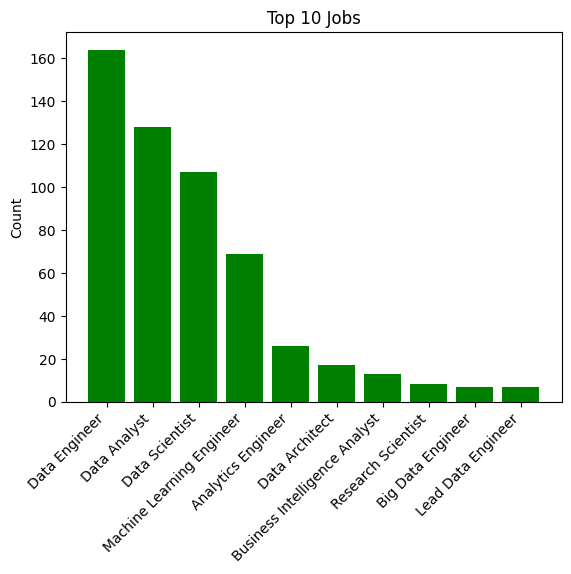

In [98]:
top_10 = df['job_title'].value_counts().head(10)

# Create a bar chart
plt.bar(top_10.index, top_10.values)

# Color it
plt.bar(top_10.index, top_10.values, color='green')

# Customize the plot
plt.xlabel('')
plt.ylabel('Count')
plt.title('Top 10 Jobs')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 2. TOP 10 COUNTRIES

In [99]:
top_loca = df['location'].value_counts().head(10)
top_loca

location
United States                 294
India                         133
United Kingdom                106
France                         61
Remote                         57
Berlin, Germany                31
Bangkok                        17
Spain                          16
Johannesburg, South Africa     13
Sydney, Australia              12
Name: count, dtype: int64

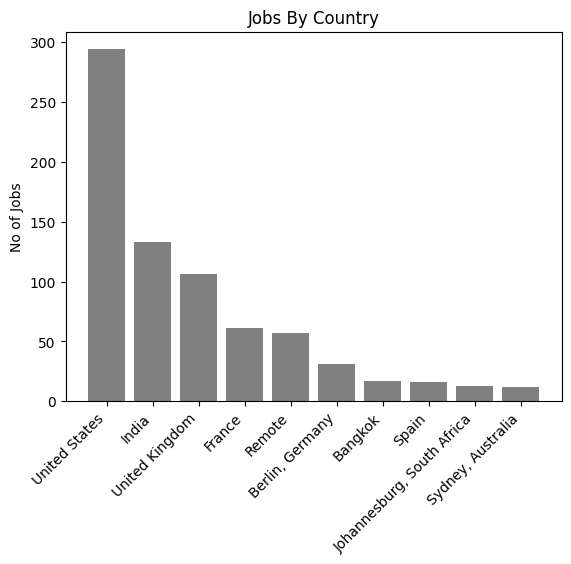

In [100]:
# Create a bar chart
plt.bar(top_loca.index, top_loca.values)

plt.bar(top_loca.index, top_loca.values, color='grey')

# Customize the plot
plt.xlabel('')
plt.ylabel('No of Jobs')
plt.title('Jobs By Country')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 3. DATA SCIENTIST DEMAND PER COUNTRY

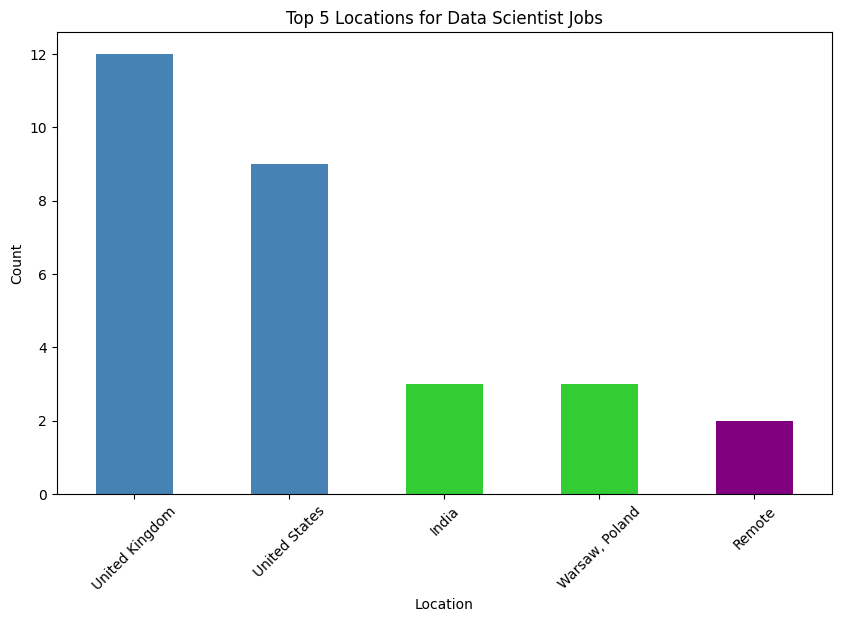

In [101]:
# Step 1: Filter rows with job_title = 'Data Scientist' (case-insensitive)
filtered_df = df[df['job_title'].str.lower() == 'data scientist'.lower()]

# Step 2: Group by 'location' and count occurrences
location_counts = filtered_df.groupby('location').size()

# Step 3: Sort locations in descending order
sorted_locations = location_counts.sort_values(ascending=False)

# Step 4: Select top 5 locations
top_5_locations = sorted_locations.head(5)

# Create the bar chart with custom colors
colors = ['steelblue', 'steelblue', 'limegreen', 'limegreen', 'purple',
          'gold', 'gold', 'tomato', 'tomato', 'tomato']

plt.figure(figsize=(10, 6))
top_5_locations.plot(kind='bar', color=colors)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 5 Locations for Data Scientist Jobs')
plt.xticks(rotation=45)

plt.show()

## 4. TOP REQUIREMENTS

In [102]:
# Combine all elements in the 'requirements' column into a single string
combined_requirements = ','.join(df['requirements'])

# Split the combined string on commas to extract individual elements
all_elements = combined_requirements.split(',')

# Use value_counts() to count the frequency of each unique element
top_elements = pd.Series(all_elements).value_counts().head(30)

top_elements

Computer Science         945
Engineering              855
AWS                      737
Architecture             665
                         623
Agile                    498
Big Data                 483
Data analysis            471
Azure                    451
Machine Learning         413
Business Intelligence    374
Data Analytics           321
APIs                     321
Excel                    279
Data pipelines           263
Airflow                  257
Consulting               249
Data visualization       239
Deep Learning            233
Python                   232
Data management          218
Data quality             214
Finance                  185
BigQuery                 174
CI/CD                    169
Data Mining              161
ETL                      158
Economics                153
Computer Vision          149
Mathematics              149
Name: count, dtype: int64

In [103]:
#drop the empty column

top_elements = top_elements.drop(top_elements.index[4])

top_elements

Computer Science         945
Engineering              855
AWS                      737
Architecture             665
Agile                    498
Big Data                 483
Data analysis            471
Azure                    451
Machine Learning         413
Business Intelligence    374
Data Analytics           321
APIs                     321
Excel                    279
Data pipelines           263
Airflow                  257
Consulting               249
Data visualization       239
Deep Learning            233
Python                   232
Data management          218
Data quality             214
Finance                  185
BigQuery                 174
CI/CD                    169
Data Mining              161
ETL                      158
Economics                153
Computer Vision          149
Mathematics              149
Name: count, dtype: int64

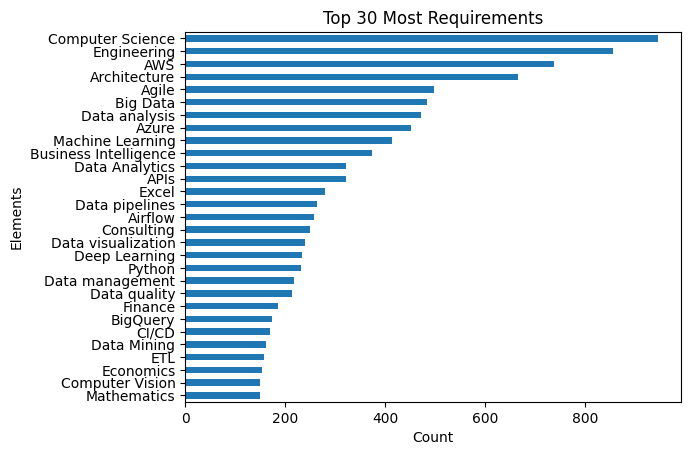

In [104]:
# Sort the top_elements in descending order
top_elements_sorted = top_elements.sort_values(ascending=True)

# Plot the column chart
top_elements_sorted.plot(kind='barh')

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Elements')
plt.title('Top 30 Most Requirements')

# Display the plot
plt.show()

## 5. DATA SCIENTIST MOST DESIRED SKILL

### Test Analysis 1

In [105]:
#filtered_df 

# Step 2: Concatenate all 'requirements' strings into a single string for Data Scientist jobs
all_requirements_text = ' '.join(filtered_df['requirements'].astype(str))

# Step 3: Split the text into individual requirements
individual_requirements = all_requirements_text.split(',')

# Step 4: Create a Pandas Series from the list of individual requirements
requirements_series = pd.Series(individual_requirements)

# Step 5: Count the occurrences of each requirement
requirement_counts = requirements_series.value_counts()

# Step 6: Find the most repeated requirements
most_repeated_requirements = requirement_counts.head(20)  # Change 5 to the desired number of top requirements

print("Most Asked Requirements for Data Scientist:")
print(most_repeated_requirements)

Most Asked Requirements for Data Scientist:
Computer Science      49
Engineering           32
Data Mining           25
Data analysis         23
Machine Learning      21
Clustering            19
AWS                   17
Big Data              13
Economics             13
Data visualization    13
Deep Learning         12
Azure                 10
Classification         9
Architecture           7
Data Analytics         6
Excel                  6
Mathematics            6
Consulting             6
ML models              6
Finance                6
Name: count, dtype: int64


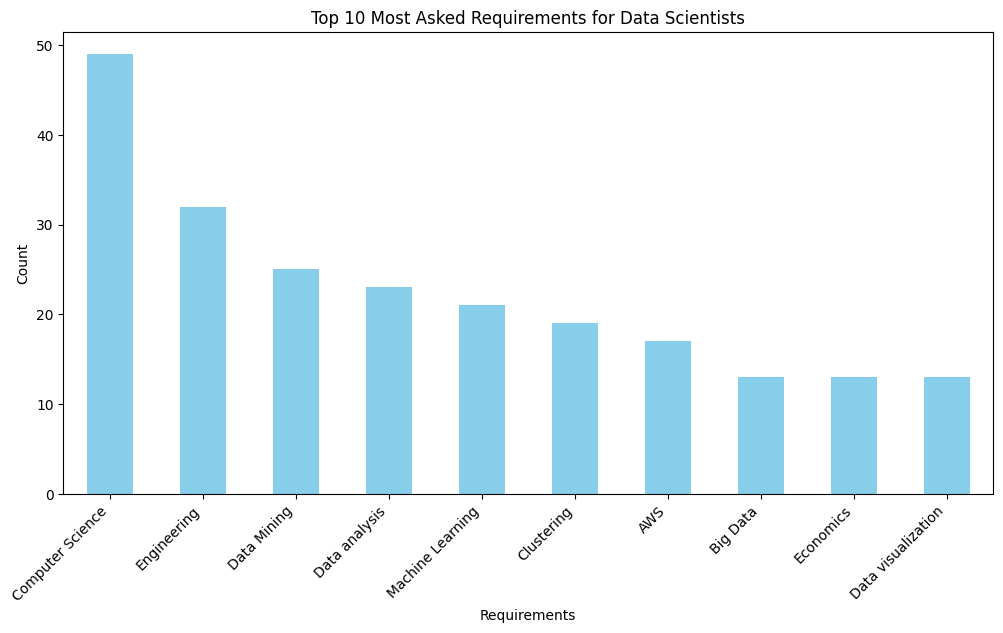

In [106]:
most_repeated_requirements2 = requirement_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))

most_repeated_requirements2.plot(kind='bar', color='skyblue')
plt.xlabel('Requirements')
plt.ylabel('Count')
plt.title('Top 10 Most Asked Requirements for Data Scientists')
plt.xticks(rotation=45, ha='right')
plt.show()

In [107]:
# Making it ready for the data visualization tool

aws = df[df['requirements'].str.contains('AWS', case=False)]

In [108]:
azure = df[df['requirements'].str.contains('Azure', case=False)]

In [109]:
bq = df[df['requirements'].str.contains('BigQuery', case=False)]

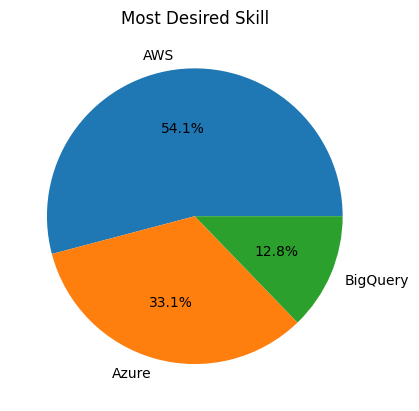

In [110]:
# Get the counts
aws_count = len(aws)
azure_count = len(azure)
bq_count = len(bq)

# Create a pie chart
labels = ['AWS', 'Azure', 'BigQuery']
counts = [aws_count, azure_count, bq_count]

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Most Desired Skill')

plt.show()

## 6. Python VS R

In [111]:
python = df[df['requirements'].str.contains('Python', case=False)]

In [112]:
# import re

r = df[df['requirements'].str.contains(r'\bR\b', case=re.IGNORECASE, regex=True, na=False)]


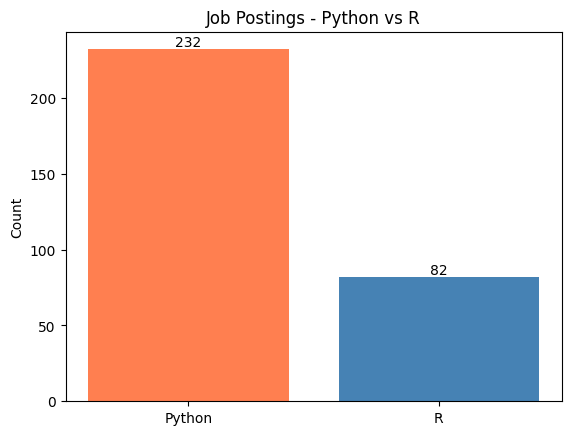

In [113]:
# Get the counts
python_count = len(python)
r_count = len(r)

# Create a bar plot
labels = ['Python', 'R']
counts = [python_count, r_count]

# Define colors for the bars
colors = ['coral', 'steelblue']

plt.bar(labels, counts, color=colors)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Job Postings - Python vs R')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

### Test analysis 2: Jobs that needs Python the most

C:\Users\gabri\AppData\Local\Temp\ipykernel_1548\1071244272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')


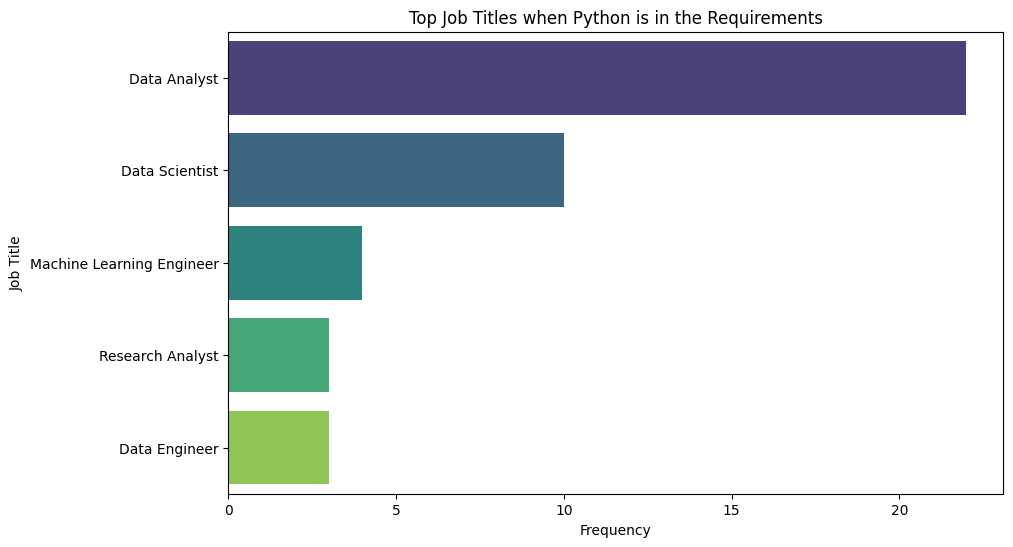

In [114]:
# Step 1: Filter rows where 'requirements' contain 'Python'
python_jobs = df[df['requirements'].str.contains('Python', case=False)]

# Step 2: Analyze the distribution of job titles
job_title_distribution = python_jobs['job_title'].value_counts()

# Step 3: Display the top job titles
top_job_titles = job_title_distribution.head(5)

# Step 4: Plot the top job titles with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.title('Top Job Titles when Python is in the Requirements')
plt.show()

## 7. IS THERE A CORRELATION BETWEEN SALARIES AND JOBS?

In [115]:
df['salary'] = df['salary'].replace({'K': '000'}, regex=True).map(pd.eval).astype(float)


### Standard deviation

It is a little bit high above the mean, meaning that salaries are spread out over a wider range, and there may be significant differences between individual salaries

In [116]:
# Calculate the standard deviation for the 'salary' column

salary_std = df['salary'].std()

print(f"Standard Deviation of 'salary': {salary_std}")

Standard Deviation of 'salary': 42564.12376960718


### Distribution Shape

Here we can see a right skewed distribution (Positive distribution shape) meaning that most of the jobs offers lower salaries below the mean

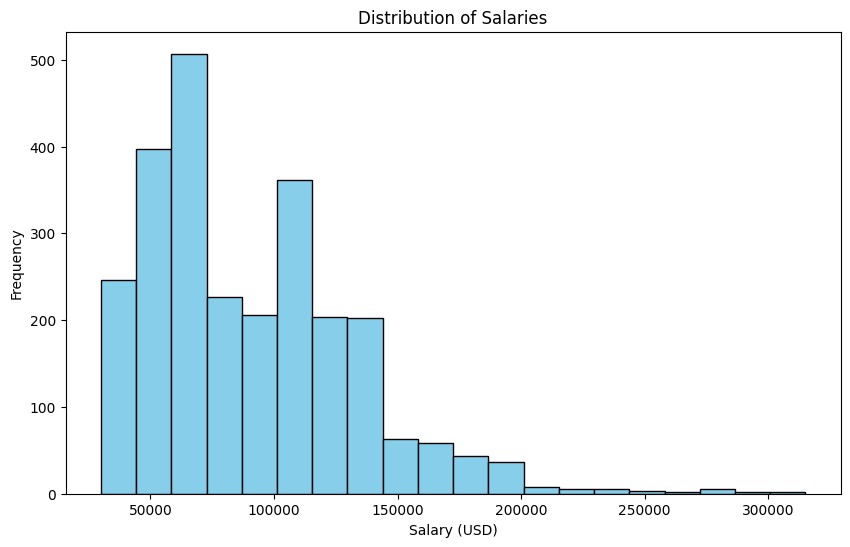

In [117]:
plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### Same here

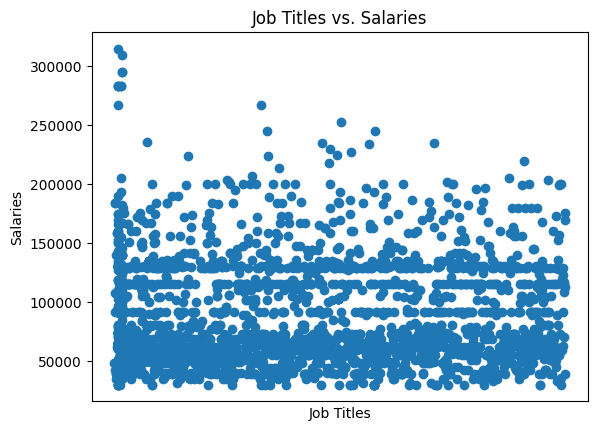

In [118]:
# Convert 'salary' column to numeric, with errors='coerce'
df['salary'] = pd.to_numeric(df['salary'])

# Remove rows with non-numeric 'salary' values
df = df.dropna(subset=['salary'])

# Create scatter plot
plt.scatter(df['job_title'], df['salary'])

# Customize plot
plt.title('Job Titles vs. Salaries')
plt.xlabel('Job Titles')
plt.ylabel('Salaries')

# Remove X legend
plt.xticks([])

# Display the plot
plt.show()

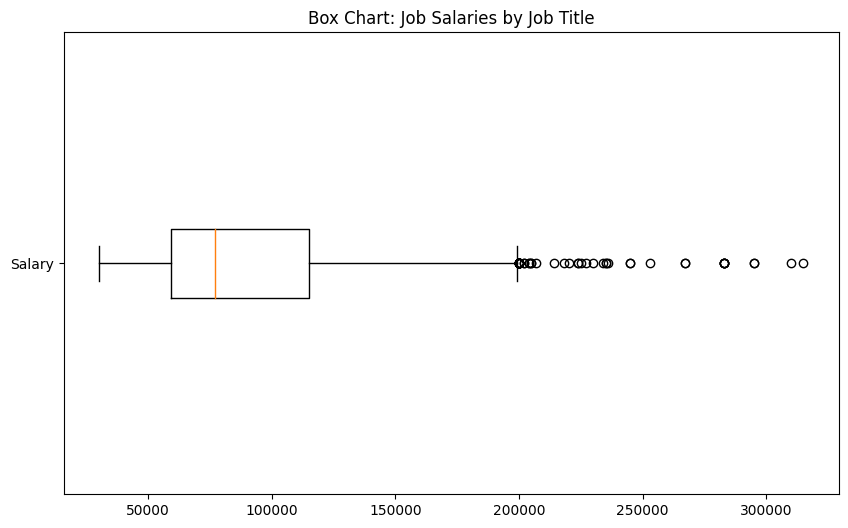

In [119]:
# Plot the box chart for job salaries against job titles
plt.figure(figsize=(10, 6))
plt.boxplot(df['salary'], vert=False)
plt.yticks([1], ['Salary'])
plt.xticks()
plt.title('Box Chart: Job Salaries by Job Title')
plt.show()

## 8. LEVELS DEMANDED COMPARISON 

In [120]:
# Create a new DataFrame with the count of experience levels
experience_counts = df['experience_level'].value_counts().reset_index()

# Rename the columns
experience_counts.columns = ['Experience Level', 'Count']

# Display the new DataFrame
experience_counts

,Experience Level,Count
0,Senior-level,1687
1,Mid-level,433
2,Entry-level,351
3,Executive-level,117


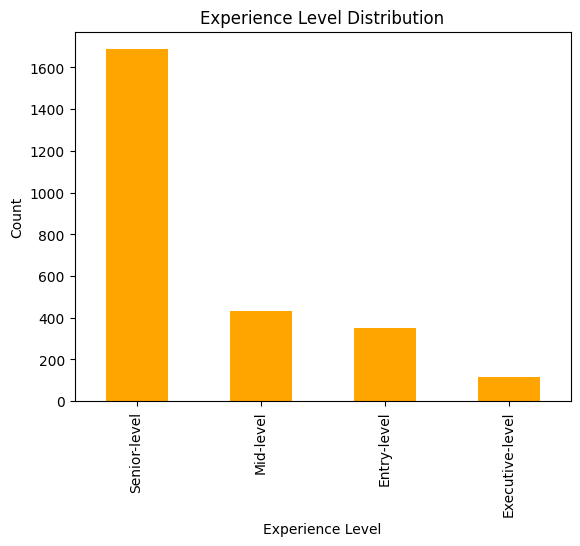

In [121]:
# Example 2: Experience level distribution
experience_counts = df['experience_level'].value_counts()
experience_counts.plot(kind='bar', color='orange')
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


### Heatmap
Salary seems to be hands on hand with experience level, which makes very sense

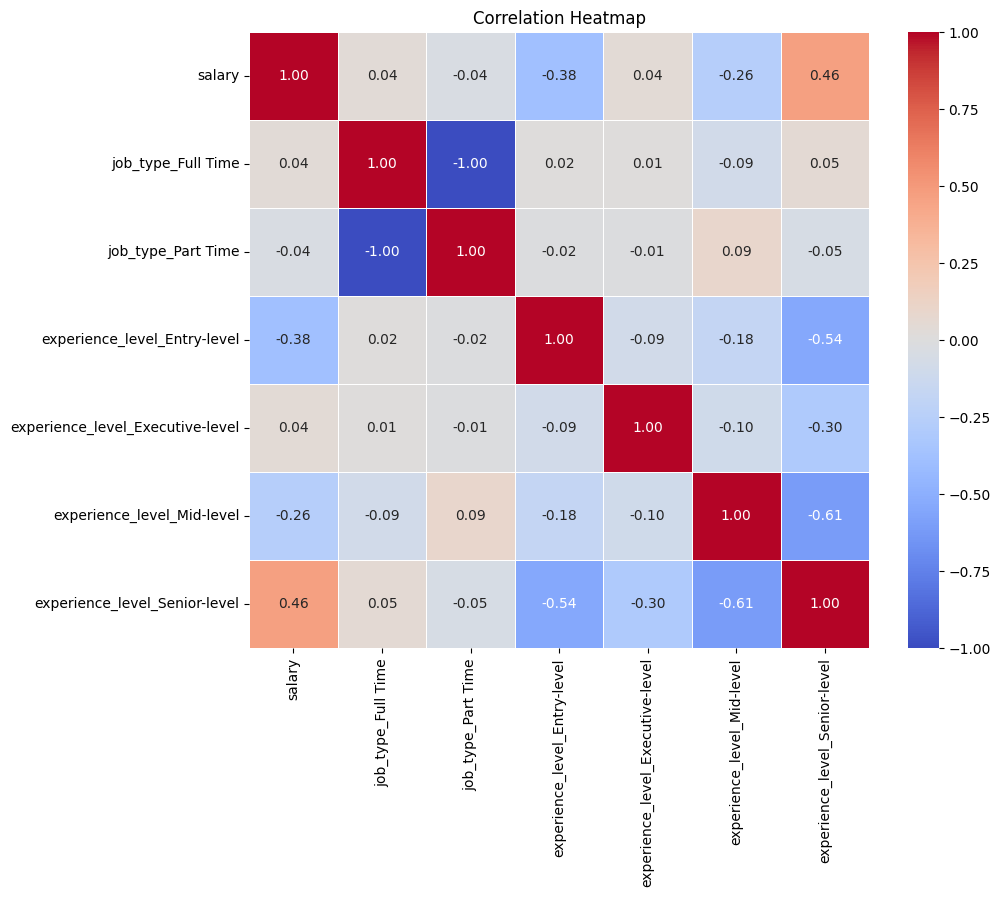

In [122]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df[['job_type', 'experience_level']])

# Concatenate the numerical columns with the encoded ones
df_numeric = pd.concat([df[['salary']], df_encoded], axis=1)

# Create a correlation matrix
correlation_matrix = df_numeric.corr()

# Use a heatmap to visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 9. DATA JOBS WITH THE HIGHEST SALARIES

In [123]:
# Group the DataFrame by 'job_title' and get the 10 highest salaries for each group
top_salaries = df.groupby('job_title')['salary'].nlargest(10).reset_index()

# Sort the DataFrame in descending order by salary
top_salaries = top_salaries.sort_values(by='salary', ascending=False)

# Display the resulting DataFrame
top_salaries.head(10)

,job_title,level_1,salary
1434,Machine Learning Engineer,868,315000.0
960,Data Scientist,789,310000.0
961,Data Scientist,688,295000.0
962,Data Scientist,785,295000.0
691,Data Engineer,596,283000.0
1435,Machine Learning Engineer,665,283000.0
1436,Machine Learning Engineer,720,283000.0
1437,Machine Learning Engineer,744,283000.0
692,Data Engineer,732,283000.0
1438,Machine Learning Engineer,736,267000.0


### Percentiles

In [124]:
salary_column = df['salary']

# Define the percentiles you want to calculate (e.g., 25th, 50th, and 75th percentiles)
percentiles = [25, 50, 75]

# Calculate the percentiles
percentile_values = np.percentile(salary_column, percentiles)

# Print the results
for i, value in zip(percentiles, percentile_values):
    print(f"{i}th percentile: ${value}")

25th percentile: $59000.0
50th percentile: $77000.0
75th percentile: $115000.0


## 10. THE HIGHEST SALARY FOR A DATA SCIENTIST

In [125]:
# Filter the DataFrame for 'Data Scientist' job title
data_scientist_salaries = df[df['job_title'] == 'Data Scientist']

# Get the top 5 highest salaries for Data Scientist
top_data_scientist_salaries = data_scientist_salaries.nlargest(1, 'salary')[['job_title', 'salary']]

# Display the top 5 highest salaries for Data Scientist
top_data_scientist_salaries

,job_title,salary
789,Data Scientist,310000.0


### T-Test Hypothesis

Data Scientist vs ML Engineer

In [126]:
# Select salaries for Data Scientist jobs
data_scientist_salaries = df[df['job_title'] == 'Data Scientist']['salary']

# Select salaries for Machine Learning Engineer jobs
ml_engineer_salaries = df[df['job_title'] == 'Machine Learning Engineer']['salary']

# Perform an independent t-test
t_statistic, p_value = ttest_ind(data_scientist_salaries, ml_engineer_salaries, equal_var=False)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in salaries.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in salaries.")

T-Statistic: -2.123538495176504
P-Value: 0.035640832105933946
Reject the null hypothesis. There is a significant difference in salaries.


Data Analysts VS Data Scientists

In [127]:
# Select salaries for Data Scientist jobs
data_scientist_salaries = df[df['job_title'] == 'Data Scientist']['salary']

# Select salaries for Data Analyst jobs
ml_engineer_salaries = df[df['job_title'] == 'Data Analyst']['salary']

# Perform an independent t-test
t_statistic, p_value = ttest_ind(data_scientist_salaries, ml_engineer_salaries, equal_var=False)

# Print the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in salaries.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in salaries.")

T-Statistic: 5.675954380939662
P-Value: 7.117867186197407e-08
Reject the null hypothesis. There is a significant difference in salaries.


I think we should become a Data Scientist by now...

## FEATURE ENGINEERING
Last arrangements for data visualization tool

In [128]:
# Making it ready for the data visualization tool

df['excel'] = df['requirements'].apply(lambda x: 'yes' if 'Excel' in x.lower() else 'no')

df['tableau'] = df['requirements'].apply(lambda x: 'yes' if 'tableau' in x.lower() else 'no')

df['power_bi'] = df['requirements'].apply(lambda x: 'yes' if 'power bi' in x.lower() else 'no')

df['sql'] = df['requirements'].apply(lambda x: 'yes' if 'sql' in x.lower() else 'no')

df['python'] = df['requirements'].apply(lambda x: 'yes' if 'python' in x.lower() else 'no')

## SAVING IT TO A NEW CSV FILE

In [129]:
df.to_csv('BigDataJobs.csv', index=False)
